In [11]:
import gymnasium as gym
import flappy_bird_gymnasium
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import BaseCallback, CheckpointCallback
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import random
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import randint
import model
import pygame
import optuna

# 1 - QLearning

### Presentation of QLearning

The file qlearning.ipynb contains all the functions necessary to:
- customize the environment (change the rewards or the state format)
- train the qlearning model
- plot training score evolution
- test on validation episodes the agent

### Comparison of the different qlearning settings

Here we will plot the comparison of the different qlearning agents with respect to the customization of the environment (changing or not the rewards, changing of not the format of the states).


In [12]:
from QLearning.functions_qlearning import load_variable_pickel, define_discrete_flappy_bird, get_q_values, plot_history_reward, plot_history_score, greedy_policy_q_dict

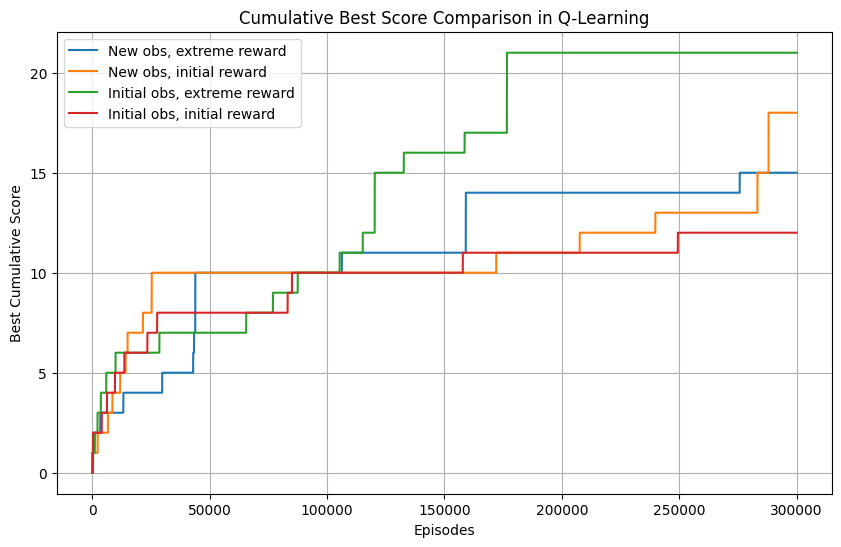

In [13]:
num_episodes=300000
episodes = range(num_episodes)

best_scores_normalObs_extremeR = np.maximum.accumulate(scores_normalObs_extremeR[:num_episodes])
best_scores_normalObs_normalR = np.maximum.accumulate(scores_normalObs_normalR[:num_episodes])
best_scores_new_obs_extremeR = np.maximum.accumulate(scores_new_obs_extremeR[:num_episodes])
best_scores_new_obs_normalR = np.maximum.accumulate(scores_new_obs_normalR[:num_episodes])


plt.figure(figsize=(10, 6))
plt.xlabel("Episodes")
plt.ylabel("Best Cumulative Score")
plt.plot(best_scores_new_obs_extremeR, label="New obs, extreme reward")
plt.plot(best_scores_new_obs_normalR, label="New obs, initial reward")
plt.plot(best_scores_normalObs_extremeR, label="Initial obs, extreme reward")
plt.plot(best_scores_normalObs_normalR, label="Initial obs, initial reward")
plt.legend()
plt.title("Cumulative Best Score Comparison in Q-Learning")
plt.grid(True)
plt.show()

### Testing the best QLearning setting on new episodes

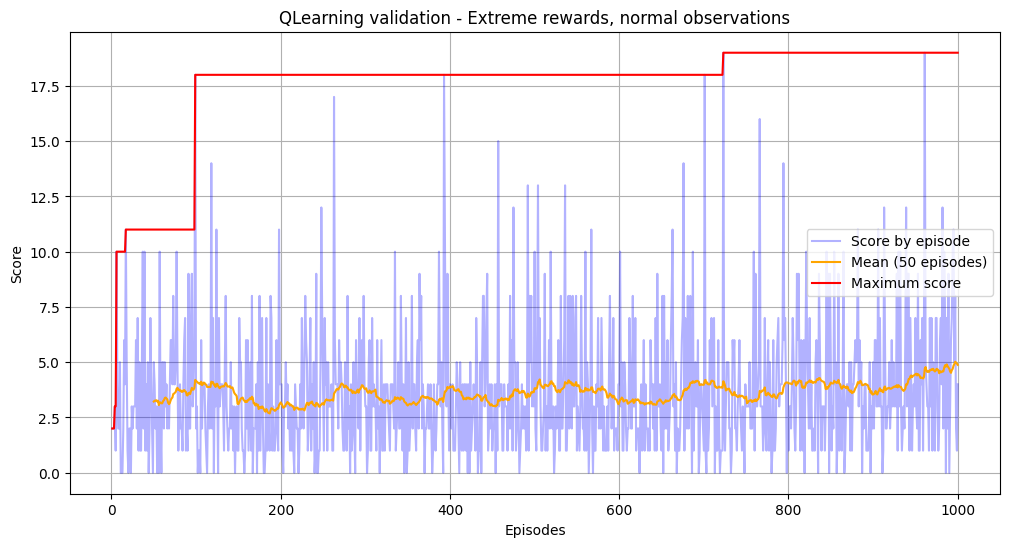

In [14]:
environment = define_discrete_flappy_bird(simplify_obs=False)
q_table = load_variable_pickel(".\QLearning\data\q_table_extreme_reward_ep350000_obs_original.pkl")

reward_list = []
score_list=[]
NUM_EPISODES = 1000

for episode_index in range(NUM_EPISODES):
    state, info = environment.reset()
    episode_over = False
    cumulated_reward=0

    while not episode_over:
        action = greedy_policy_q_dict(state, q_table)
        state, reward, terminated, truncated, info = environment.step(action)
        episode_over = terminated or truncated
        cumulated_reward+=reward

    reward_list.append(cumulated_reward)
    score_list.append(info['score'])

reward_df = pd.DataFrame(reward_list)
score_df = pd.DataFrame(score_list)

environment.close()

plot_history_score(score_list, title="QLearning validation - Extreme rewards, normal observations")
